In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [10]:
# Load in your data here
data = pd.read_csv("IQmoodhc_deltaPSD.csv") #file name here

<Axes: >

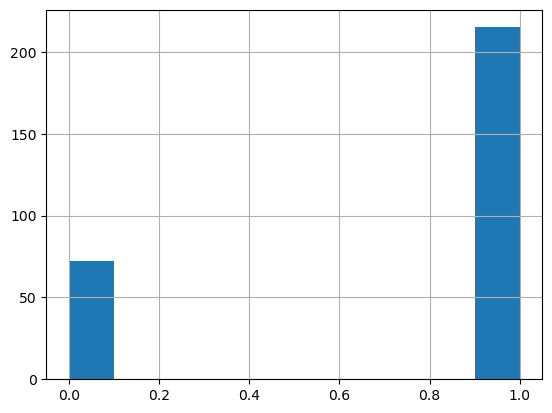

In [11]:
# Data preprocessing
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
y_train.hist()

In [12]:
# PCA data
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

Random Forest accuracy: 0.7083333333333334
Random Forest classification report
               precision    recall  f1-score   support

           0       0.18      0.14      0.16        14
           1       0.80      0.84      0.82        58

    accuracy                           0.71        72
   macro avg       0.49      0.49      0.49        72
weighted avg       0.68      0.71      0.69        72

Random Forest AUC value: 0.6828817733990148


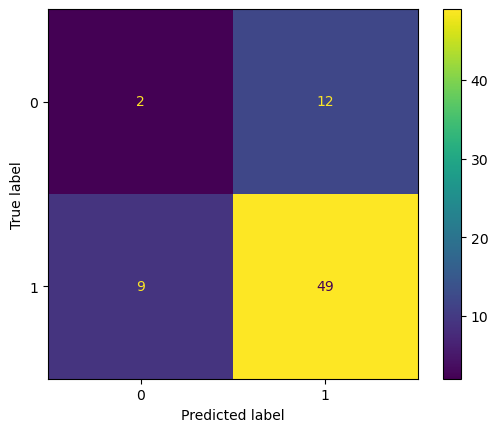

In [13]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)
print('Random Forest accuracy:', model.score(X_test, y_test))
y_pred = model.predict(X_test)
print('Random Forest classification report\n',classification_report(y_test, y_pred))
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('Random Forest AUC value:', roc_auc)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.719 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.688 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.716 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.708 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.656 total time=   0.2s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.716 total time=   0.2s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.708 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=300;, score=0.677 total time=   0.3s
[CV 3/3] END max_depth=3, max_fea

KeyboardInterrupt: 

In [14]:
rf_optimized = model_grid.best_estimator_
y_pred = rf_optimized.predict(X_test)
accuracy_score(y_test, y_pred)
recall_score(y_test, y_pred)

NameError: name 'model_grid' is not defined

In [15]:
rfc_search_space = {
    'n_estimators': range(10, 101),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 51),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


In [16]:
rfc = RandomForestClassifier()

In [17]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_search_space, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_depth': range(2, 51), 'max_features': ['sqrt', 'log2', ...], ...}"
,n_iter,100
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [18]:
best_params = random_search.best_params_
rfc = RandomForestClassifier(**best_params)

In [19]:
rfc.fit(X_train, y_train)

,n_estimators,71
,criterion,'entropy'
,max_depth,44
,min_samples_split,7
,min_samples_leaf,9
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
y_scores = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('Random Forest AUC value:', roc_auc)

Accuracy: 0.8055555555555556
Random Forest AUC value: 0.6206896551724138


In [21]:
pmodel = RandomForestClassifier(n_estimators=40)
pmodel.fit(X_train_pca, y_train)
print('\nRandom Forest accuracy for PCA:', pmodel.score(X_test_pca, y_test))
y_pred = pmodel.predict(X_test_pca)
print('Random Forest classification report for PCA:\n',classification_report(y_test, y_pred))
y_scores = pmodel.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('Random Forest AUC value for PCA:', roc_auc)


Random Forest accuracy for PCA: 0.7777777777777778
Random Forest classification report for PCA:
               precision    recall  f1-score   support

           0       0.44      0.50      0.47        14
           1       0.88      0.84      0.86        58

    accuracy                           0.78        72
   macro avg       0.66      0.67      0.66        72
weighted avg       0.79      0.78      0.78        72

Random Forest AUC value for PCA: 0.7961822660098523


In [22]:
pfc_search_space = {
    'n_estimators': range(10, 101),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 51),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


In [23]:
pfc = RandomForestClassifier()

In [24]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_search_space, n_iter=100, cv=5)
random_search.fit(X_train_pca, y_train)

,estimator,RandomForestC...estimators=71)
,param_distributions,"{'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_depth': range(2, 51), 'max_features': ['sqrt', 'log2', ...], ...}"
,n_iter,100
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [25]:
best_params = random_search.best_params_
pfc = RandomForestClassifier(**best_params)
pfc.fit(X_train_pca, y_train)

,n_estimators,18
,criterion,'entropy'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
y_predi = pfc.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_predi)
print("Accuracy:", accuracy)
y_scores = pfc.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('Random Forest AUC value:', roc_auc)

Accuracy: 0.7916666666666666
Random Forest AUC value: 0.7610837438423645


# SVM

In [27]:
svclassifier = SVC(kernel='linear',probability=True)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print('SVM accuracy:', svclassifier.score(X_test, y_test))
print('SVM classification report:\n', classification_report(y_test, y_pred))
y_scores = svclassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Calculate AUC
roc_auc = auc(fpr, tpr)
print('SVM AUC value:', roc_auc)

SVM accuracy: 0.8055555555555556
SVM classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.81      1.00      0.89        58

    accuracy                           0.81        72
   macro avg       0.40      0.50      0.45        72
weighted avg       0.65      0.81      0.72        72

SVM AUC value: 0.3435960591133005


/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/novo/miniforge3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [121]:
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.559 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [28]:
grid_predictions = grid.predict(X_test) 

print(classification_report(y_test, grid_predictions))

NameError: name 'grid' is not defined

In [29]:
newsvm=SVC(kernel='linear', probability=True)
newsvm.fit(X_train_pca, y_train)
y_pred = newsvm.predict(X_test_pca)
print('\nSVM accuracy for PCA:', newsvm.score(X_test_pca, y_test))
print('SVM classification report for PCA:\n', classification_report(y_test, y_pred))
y_scores = newsvm.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('SVM AUC value for PCA:', roc_auc)



SVM accuracy for PCA: 0.8055555555555556
SVM classification report for PCA:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        14
           1       0.88      0.88      0.88        58

    accuracy                           0.81        72
   macro avg       0.69      0.69      0.69        72
weighted avg       0.81      0.81      0.81        72

SVM AUC value for PCA: 0.8374384236453202


In [35]:
degreeG = [0, 1, 6]
cSetG = [0.1, 1, 10]
gammaG = [0.1, 1, 10]
kernelsG = ['linear', 'rbf', 'poly']



from sklearn.model_selection import GridSearchCV
model = SVC()
gridSearch = GridSearchCV(estimator=model,param_grid={'degree':degreeG,'kernel':kernelsG,'C':cSetG,'gamma':gammaG},cv=4)
gridSearch.fit(X,y)
print(f'The best parameter is {gridSearch.best_params_}')
print(f'The best score is {gridSearch.best_score_}')
print(f'The best estimator is {gridSearch.best_estimator_}')

The best parameter is {'C': 1, 'degree': 0, 'gamma': 0.1, 'kernel': 'linear'}
The best score is 0.7549625468164795
The best estimator is SVC(C=1, degree=0, gamma=0.1, kernel='linear')


In [36]:
grid_predictions = grid.predict(X_test_pca) 

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.40      0.43      0.41        14
           1       0.86      0.84      0.85        58

    accuracy                           0.76        72
   macro avg       0.63      0.64      0.63        72
weighted avg       0.77      0.76      0.77        72

